# Ordinal Logistic Regression

Ordinal logistic regression is used to predict an ordinal dependent variable given one or more independent variables. In logistic regression, the class label is of binary type but in ordinal logistic regression, it is of orderinal type.

For the implementation part, I have used one vs rest method. This strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label.

I have been using here Iris dataset. It is a commonly used dataset containing 3 species of iris plants. Each plant in the dataset has 4 attributes: sepal length, sepal width, petal length, and petal width. We will use our logistic regression model to predict flowers species using just these attributes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def cost_func(theta, x, y):
    h = sigmoid(x@theta)
    m = len(y)
    cost = np.sum(-y*np.log(h)-(1-y)*np.log(1-h))*(1/m)
    gradient = ((y-h)@x)*(1/m)
    return gradient, cost

In [4]:
def model_fit(x, y, max_iter=5000, lr=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            gradient, costs[epoch] = cost_func(theta, x, binary_y)
            theta += lr*gradient  
        thetas.append(theta)
    return thetas, classes, costs

In [5]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis = 1)
    preds = []
    for data in x:
        class_belong = []
        for theta in thetas:
            t = sigmoid(data@theta)
            class_belong.append(t)
        preds.append(np.argmax(class_belong))
    ans = []
    for p in preds:
        ans.append(classes[p])
    return ans

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=[
    "Sepal length", 
    "Sepal width", 
    "Petal length",
    "Petal width",
    "Species"
])
print(df.shape)
df.head()

(150, 5)


,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
np.random.shuffle(data)
num_train = int(0.8*len(data))  # 80/20 train/test split
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]

Text(0, 0.5, 'Petal Width')

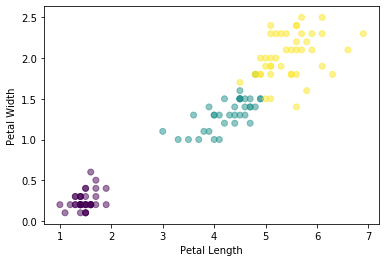

In [8]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Text(0, 0.5, 'Cost')

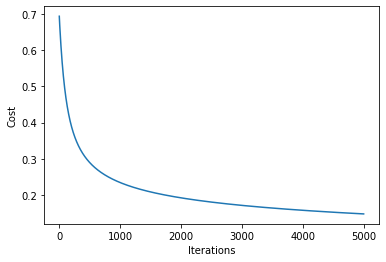

In [9]:
thetas, classes, costs = model_fit(x_train[:, 2:], y_train)
# print(len(costs))
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')

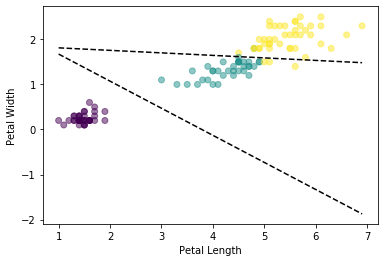

In [10]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
for theta in [thetas[0],thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
#     print("j",j)
    k = -(j * theta[1] + theta[0]) / theta[2]
#     print("k",k)
    plt.plot(j, k, color='k', linestyle="--")

In [11]:
def accu(classes, theta, x, y):
    t = predict(classes, theta, x)
    return (predict(classes, theta, x) == y).mean()

In [12]:
# print("Train Accuracy:", accu(classes, thetas, x_train[:, 2:], y_train))
# print("Test Accuracy:", accu(classes, thetas, x_test[:, 2:], y_test))

In [13]:
thetas, classes, costs = model_fit(x_train, y_train)
print("Train Accuracy:", accu(classes, thetas, x_train, y_train))
print("Test Accuracy:", accu(classes, thetas, x_test, y_test))

Train Accuracy: 0.9666666666666667
Test Accuracy: 0.9333333333333333
